In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


In [3]:
def conformality_score(true: np.ndarray, pred: np.ndarray, alpha: float):
    '''
    expls: [n_sample, 1, H, W] for Grad-CAM 
    '''
    assert true.shape == pred.shape

    n = pred.shape[0]

    score = np.abs(true - pred)
    q_hat = np.quantile(score, np.ceil((n+1) * (1-alpha)) / n, axis = 0)

    return q_hat

def get_conf_interval(expl: np.ndarray, q_hat: np.ndarray):
    high = expl + q_hat
    low = expl - q_hat
    return (low, high)

def calc_coverage_prob(true: np.ndarray, conf_low: np.ndarray, conf_high: np.ndarray):
    is_cover = np.logical_and(conf_low <= true, true <= conf_high)
    coverage_prob = np.sum(is_cover, axis = 0) / true.shape[0]

    return coverage_prob

def mismatch_rate(orig_expl, conf_high, conf_low):
    pos_mismatch = np.where(np.logical_and(orig_expl > 0, conf_low < 0))
    neg_mismatch = np.where(np.logical_and(orig_expl < 0, conf_high > 0))

    total_pixel = np.prod(orig_expl.shape)
    total_mismatch = len(pos_mismatch[0]) + len(neg_mismatch[0])
    # print(len(pos_mismatch[0]))
    # print(len(neg_mismatch[0]))
    return total_mismatch / total_pixel

In [3]:
for expl_method in ['IG']:
    for img_name in ["n01443537_605.JPEG"]:
        for seed in range(1, 5, 1):
            filepath = f"results/20230204_pred_orig_eval_orig_transform_both_sign_all_reduction_none/{img_name}_expl_{expl_method}_sample_20000_sigma_0.05_seed_{seed}_orig_true_pred.npy"
            with open(filepath, "rb") as f:
                orig_expl = np.load(f)
                true_expls = np.load(f)
                pred_expls = np.load(f)

            testpath = f"results/20230204_pred_orig_eval_orig_transform_both_sign_all_reduction_none/{img_name}_expl_{expl_method}_sample_20000_sigma_0.05_seed_0_test.npy"
            with open(testpath, "rb") as f:
                test_expls = np.load(f)


            if orig_expl.shape[0] > 1:
                orig_expl = np.sum(orig_expl, axis = 0)
                true_expls = np.sum(true_expls, axis = 1)
                pred_expls = np.sum(pred_expls, axis = 1)
                test_expls = np.sum(test_expls, axis = 1)


            results = []


            for alpha in np.arange(0.05, 1, 0.05):
                q_hat = conformality_score(true_expls, pred_expls, alpha)
                conf_low, conf_high = get_conf_interval(orig_expl, q_hat)
                prob = calc_coverage_prob(test_expls, conf_low, conf_high)

                print(alpha, np.mean(prob), np.std(prob))
                print(mismatch_rate(orig_expl, conf_high, conf_low))

                results.append({
                    'alpha': alpha,
                    'coverage_prob': prob,
                    'mean_coverage_prob': np.mean(prob),
                    'std_coverage_prob': np.std(prob),
                    'mismatch_rate': mismatch_rate(orig_expl, conf_high, conf_low),
                    'conf_high': conf_high,
                    'conf_low' : conf_low,
                })
                
            with open(f"results/20230204_pred_orig_eval_orig_transform_both_sign_all_reduction_none/{img_name}_expl_{expl_method}_sample_20000_sigma_0.05_seed_{seed}_results.npy", "wb") as f:
                np.save(f, np.stack(results))

0.05 0.9510606275908803 0.002156377571911829
1.0
0.1 0.9016330905213646 0.0029945965722743112
1.0
0.15000000000000002 0.8519622777822066 0.0035938580390045363
1.0
0.2 0.8021371880978955 0.004053284316080634
1.0
0.25 0.7522022610411351 0.004394476987442502
1.0
0.3 0.7021809560347577 0.004649849623742453
1.0
0.35000000000000003 0.6521227369658801 0.004841068079599467
0.9999402104591837
0.4 0.6020069764429209 0.00498856266290484
0.9996611926020408
0.45 0.5518687370455995 0.005071282530724251
0.9967912946428571
0.5 0.501696817203444 0.005088147980806892
0.9607979910714286
0.55 0.4515132633131378 0.005075426320329127
0.8479751275510204
0.6000000000000001 0.40132992267219386 0.0049764057651606585
0.7382015306122449
0.6500000000000001 0.35114817641900514 0.004839117648188457
0.6328324298469388
0.7000000000000001 0.30096574059311226 0.004651967855461147
0.5289182079081632
0.7500000000000001 0.2508060227997449 0.004385195106611018
0.42906967474489793
0.8 0.20063741629464285 0.00405871925881205


FileNotFoundError: [Errno 2] No such file or directory: 'results/20230204_pred_orig_eval_orig_transform_both_sign_all_reduction_none/n01443537_605.JPEG_expl_IG_sample_20000_sigma_0.05_seed_2_orig_true_pred.npy'

In [4]:
results = []


for alpha in np.arange(0.05, 1, 0.05):
    q_hat = conformality_score(true_expls, pred_expls, alpha)
    conf_low, conf_high = get_conf_interval(orig_expl, q_hat)
    prob = calc_coverage_prob(test_expls, conf_low, conf_high)

    print(alpha, np.mean(prob), np.std(prob))
    print(mismatch_rate(orig_expl, conf_high, conf_low))

    results.append({
        'alpha': alpha,
        'coverage_prob': prob,
        'mean_coverage_prob': np.mean(prob),
        'std_coverage_prob': np.std(prob),
        'mismatch_rate': mismatch_rate(orig_expl, conf_high, conf_low),
        'conf_high': conf_high,
        'conf_low' : conf_low,
    })
    
with open("results/20230204_pred_orig_eval_orig_transform_both_sign_all_reduction_none/n01443537_605.JPEG_expl_InputXGrad_sample_20000_sigma_0.05_seed_1_results.npy", "wb") as f:
    np.save(f, np.stack(results))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0.5, 1.0, 'seed: 1')

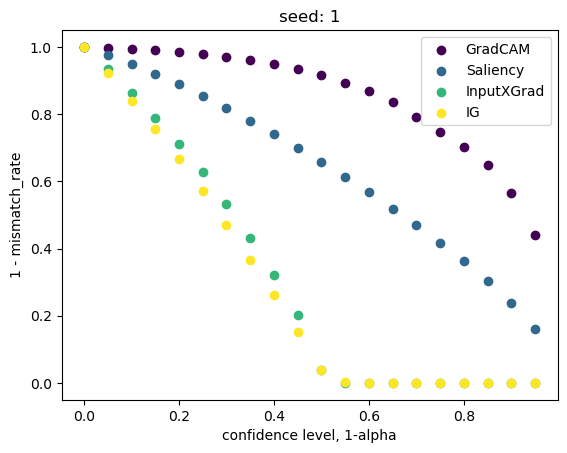

In [4]:
cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, 4))
seed = 1
for expl_method, color in zip(["GradCAM", "Saliency", "InputXGrad", "IG"], colors):
    with open(f"results/20230204_pred_orig_eval_orig_transform_both_sign_all_reduction_none/n01443537_605.JPEG_expl_{expl_method}_sample_20000_sigma_0.05_seed_{seed}_results.npy", "rb") as f:
        results = np.load(f, allow_pickle=True)

    # print(results)
    for res in results:
        # print(1-res['alpha'], res['mismatch_rate'])
        plt.scatter(1 - res['alpha'], 1 - res['mismatch_rate'], c=color)

    plt.scatter(0, 1, c=color, label=expl_method)

    plt.xlabel("confidence level, 1-alpha")
    plt.ylabel("1 - mismatch_rate")
    
plt.legend()
plt.title(f"seed: {seed}")

In [9]:
from scipy.integrate import simpson

y = [1.0]
for res in results:
    y.append(res['mismatch_rate'])

y.append(0.0)
area = simpson(y, dx = 0.05)
area


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


0.6875093005952381

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import torchvision
import numpy as np
import torch
import cv2

from PIL import Image
from transform_factory import resize_322, center_crop_224, imagenet_normalize, tensorize, get_spatial_transform, get_color_transform
from torchvision import transforms
from expl import ExplFactory
from captum.attr import visualization as viz
from torchvision.models import resnet50, ResNet50_Weights
from matplotlib.colors import LinearSegmentedColormap

In [10]:
orig_img_path = "/home/juhyeon/Imagenet/train/n02100236/n02100236_390.JPEG"

orig_img = Image.open(orig_img_path)

print(type(orig_img))
_orig_img = tensorize(center_crop_224(resize_322(orig_img))).unsqueeze(0).cuda()
_orig_img = np.transpose(_orig_img.squeeze().cpu().detach().numpy(), (1,2,0))


conf_high, conf_low = results[0]['conf_high'], results[0]['conf_low']

# orig_expl = np.transpose(orig_expl, (1,2,0))
# conf_high = np.transpose(conf_high, (1,2,0))
# conf_low = np.transpose(conf_low, (1,2,0))

# _ = viz.visualize_image_attr(orig_expl, _orig_img, method='heat_map', show_colorbar=True, sign='positive', outlier_perc=1)
# _ = viz.visualize_image_attr(conf_high, _orig_img, method='heat_map', show_colorbar=True, sign='positive', outlier_perc=1)
# _ = viz.visualize_image_attr(conf_low, _orig_img, method='heat_map', show_colorbar=True, sign='all', outlier_perc=1)

# _ = viz.visualize_image_attr(orig_expl, _orig_img,  sign = 'all', show_colorbar=True)
# _ = viz.visualize_image_attr(conf_high, _orig_img,  sign = 'all', show_colorbar=True)
# _ = viz.visualize_image_attr(conf_low, _orig_img, sign = 'all', show_colorbar=True)
fig, axes = plt.subplots(1, 3)

fig.suptitle("GradCAM")

for i, ax in enumerate(axes.flat):
    if i == 0:
        im = ax.imshow(orig_expl.squeeze(0), cmap="seismic", vmin=-0.5, vmax=0.5)
    elif i == 1:
        im = ax.imshow(conf_high.squeeze(0), cmap='seismic',  vmin=-0.5, vmax=0.5)
    elif i == 2:
        im = ax.imshow(conf_low.squeeze(0), cmap='seismic',  vmin=-0.5, vmax=0.5)

cax, kw = mpl.colorbar.make_axes([ax for ax in axes.flat])
print(cax, kw)
# kw.update({'orientation':'horizontal', 'ticklocation':'top'})
fig.colorbar(im, cax=cax, **kw)
plt.show()


NameError: name 'Image' is not defined

In [41]:
print(conf_low[:, 120, 120])

[-0.00680201]


In [42]:
print(conf_high[:,120, 120])

[0.08890481]


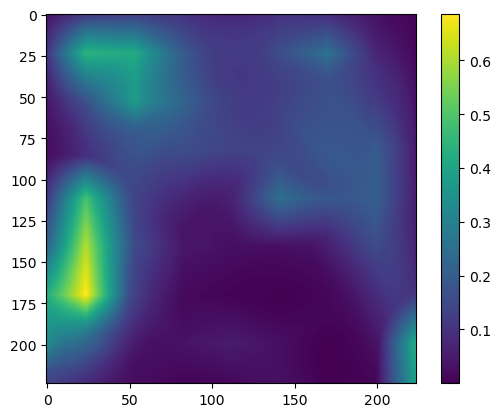

In [45]:
plt.imshow(conf_high.squeeze(0))
plt.colorbar()

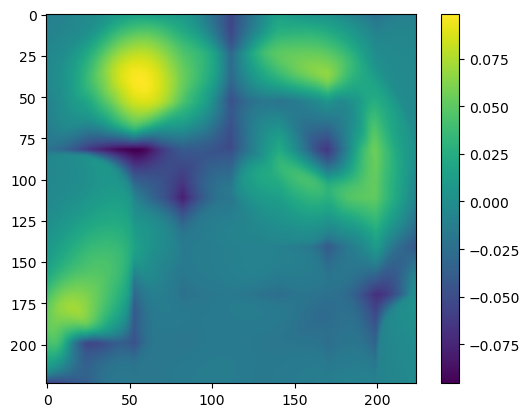

In [46]:
plt.imshow(conf_low.squeeze(0))
plt.colorbar()
